In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

1. Checking if all the features are numeric.


In [23]:
#Loading the dataset
df = pd.read_csv('/content/population_diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Replacing 0 with NaN value.


In [24]:
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [27]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


3.Filling these Nan values with mean,median & mode.

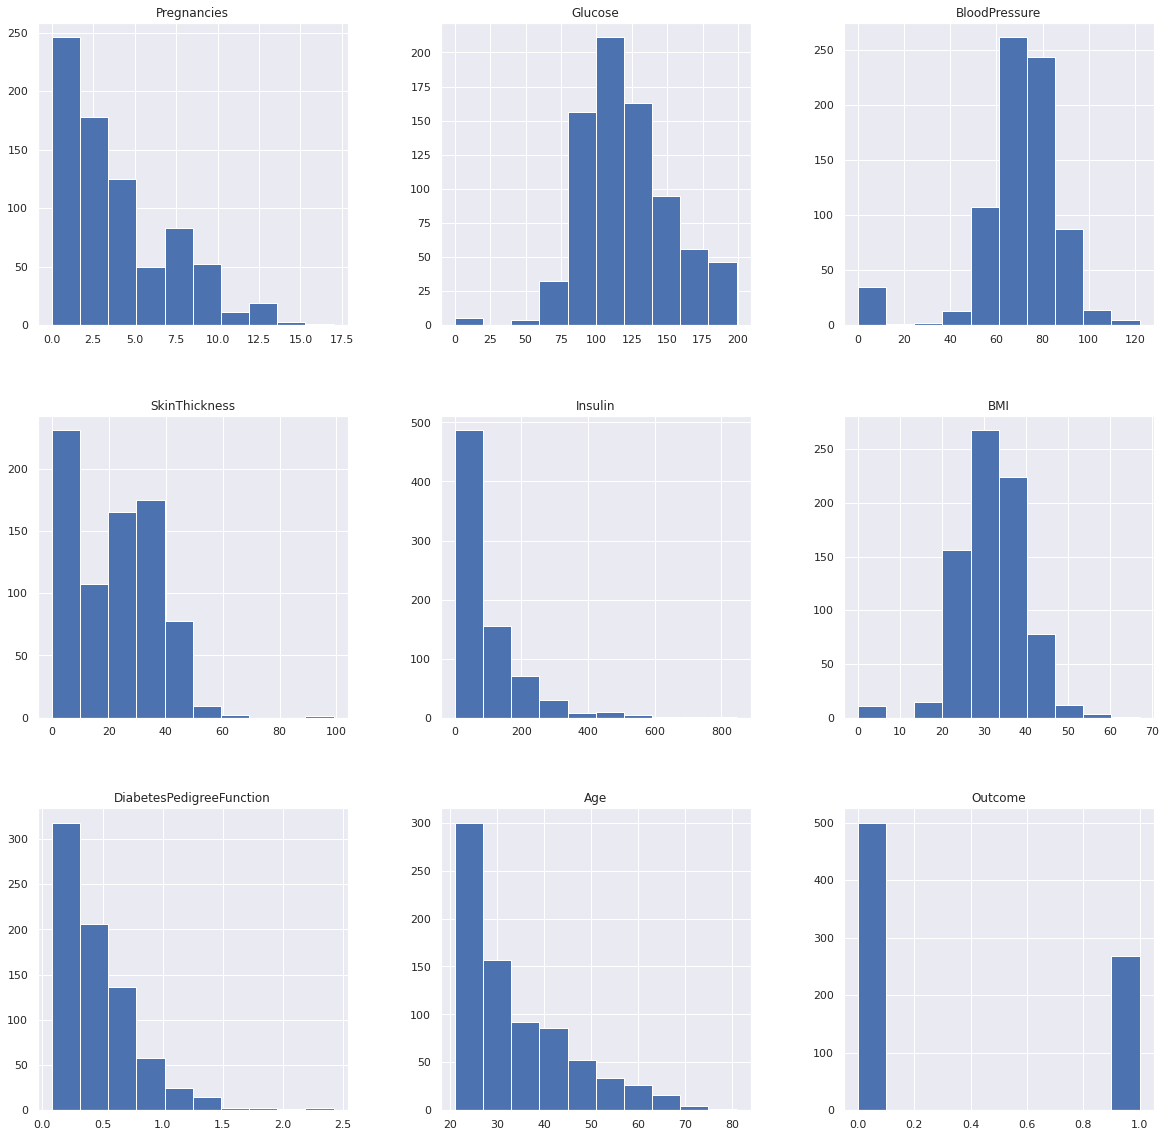

In [28]:
p = df.hist(figsize = (20,20))


In [29]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

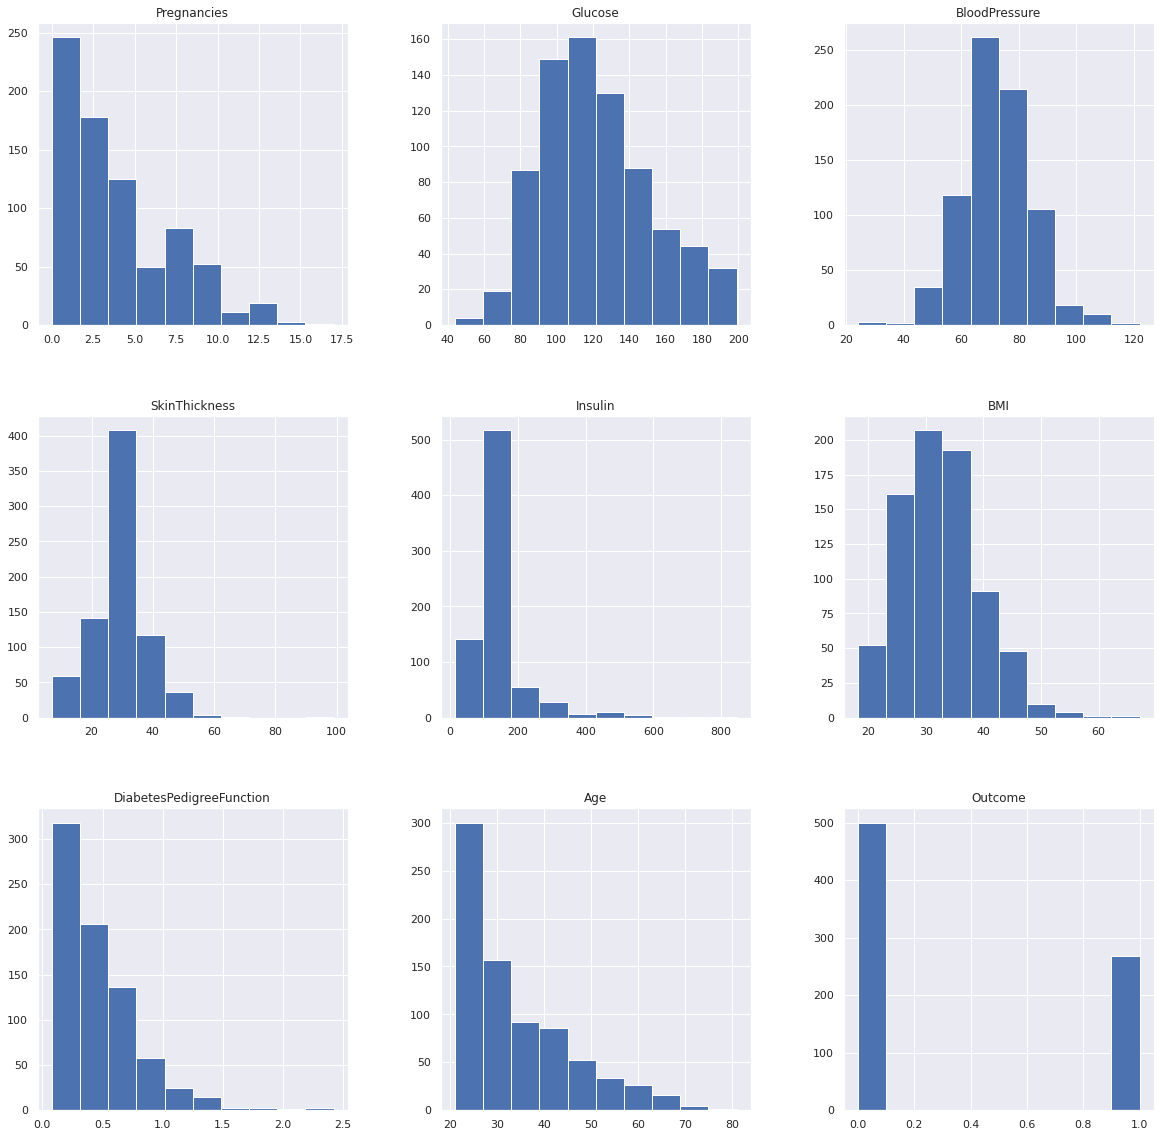

In [30]:
p = df_copy.hist(figsize = (20,20))


In [31]:
df.shape

(768, 9)

4. Correlation Matrix

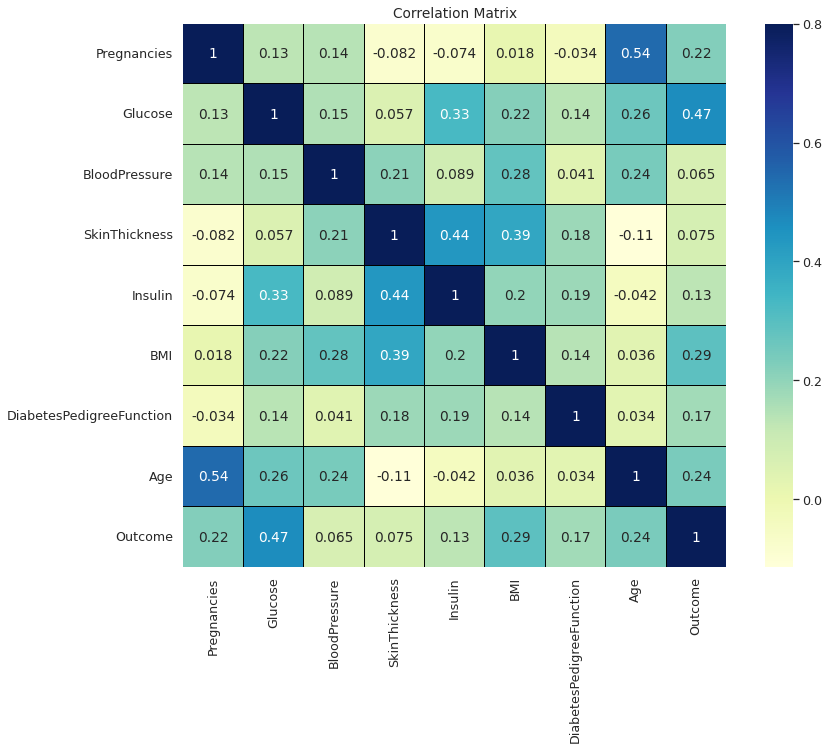

In [35]:
corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation Matrix');

5.Descriptive Statistical Analysis

In [36]:
import scipy.stats as st
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


6. Inferential Statistics

Normal Deviate Z Test 

In [39]:
import scipy.stats as st
Mu = 72.4  
Std = 12.09

sample_avg_bp = np.average(df['BloodPressure'])
std_error_bp = Std / np.sqrt(df.size) # Standard dev of the sampling mean distribution... estimated from population
print("Sample Avg BP : " , sample_avg_bp)
print("Standard Error: " , std_error_bp)

# Z_norm_deviate =  sample_mean - population_mean / std_error_bp

Z_norm_deviate = (sample_avg_bp - Mu) / std_error_bp
print("Normal Deviate Z value :" , Z_norm_deviate)

p_value = st.norm.sf(abs(Z_norm_deviate))*2 #twosided using sf - Survival Function
print('p values' , p_value)
if p_value > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')
 

Sample Avg BP :  69.10546875
Standard Error:  0.145420099052137
Normal Deviate Z value : -22.65526754192918
p values 1.2379034024067366e-113
Samples are likely drawn from different distributions (reject H0)


One Sample T-Test

In [40]:
Mu = 72.4   
# Std = ?  Population standard deviatin is unknown

x = df['BloodPressure']  # Storing values in a list to avoid long names
est_pop_std = np.sqrt(np.sum(abs(x - x.mean())**2) / (df.size - 1))     #  sqrt(sum(xi - Xbar)^2 / (n -1))

sample_avg_bp =(df['BloodPressure']).mean()

std_error_bp = est_pop_std / np.sqrt(df.size) # Standard dev of the sampling mean distribution... estimated from population

T_Statistic = (( sample_avg_bp - Mu) / std_error_bp)

pvalue = st.t.sf(np.abs(T_Statistic),df.size-1)*2
print("Estimated Pop Stand Dev" , est_pop_std)
print("Sample Avg BP : " , sample_avg_bp)
print("Standard Error: " , std_error_bp)
print("T Statistic" , T_Statistic)
print("Pval" , pvalue)
if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

Estimated Pop Stand Dev 6.448200342877043
Sample Avg BP :  69.10546875
Standard Error:  0.07755979591143121
T Statistic -42.47730684802432
Pval 0.0
Samples are likely drawn from different distributions (reject H0)
